In [56]:
import numpy as np
from numpy import ndarray

In [81]:
def solve_upper_trig(A: np.ndarray, b: np.ndarray):
    n = A.shape[0]
    A = np.c_[A, b]
    solutions = np.array([A[n - 1][n] / A[n - 1][n - 1]])
    for i in range(n - 2, -1, -1):
        x = A[i][n] - np.dot(solutions, A[i, (i+1):n])
        solutions = np.insert(solutions, 0, x / A[i, i])
    solutions = solutions.T
    return solutions


def solve_down_trig(A: np.ndarray, b: np.ndarray):
    n = A.shape[0]
    A = np.c_[A, b]
    solutions = np.array([A[0][n] / A[0][0]])
    for i in range(1, n):
        x = A[i][n] - np.dot(solutions, A[i, 0:i])
        solutions = np.insert(solutions, solutions.shape[0], x / A[i, i])  # x = np.insert(x, x.shape[0], 8)
    solution = solutions.T
    return solutions
    

def cond(m: np.array):
    M_inv = np.linalg.inv(m)
    return norm(M_inv) * norm(m)

class LUDecomposition:
    def __init__(self, A: ndarray):
        self.n = A.shape[0]
        self.A = A
        self.U = np.identity(self.n)
        self.L = np.identity(self.n)

        self.generate_decomposition()

    def generate_decomposition(self):
        for i in range(self.n):
            for j in range(i, self.n):
                self.L[j, i] = self.A[j, i]
                if i > 0:
                    self.L[j, i] -= np.dot(self.L[j, 0:i], self.U[0:i, i])
            for j in range(i, self.n):
                self.U[i, j] = self.A[i, j] / self.L[i, i]
                if i > 0:
                    self.U[i, j] -= np.dot(self.L[i, 0:i], self.U[0:i, j]) / self.L[i, i]

    def determinant(self):
        return np.product(np.diag(self.L))
    
def solve_with_LU(A, b):
    dec = LUDecomposition(A)
    L = dec.L 
    U = dec.U
    y = solve_down_trig(L, b)
    return solve_upper_trig(U, y), L, U

In [32]:
# Test
A = np.array([
    [3.278164, 1.046583, -1.378574],
    [1.046583, 2.975937, 0.934251],
    [-1.378574, 0.934251, 4.836173]
])

b = np.array([
    [-0.527466],
    [2.5268770],
    [5.165441]
])


result = LUDecomposition(A)
L = result.L 
U = result.U
#solve_upper_trig()

In [33]:
np.eye(5) * 0.05 + np.eye(5)

array([[1.05, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.05, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.05, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.05]])

In [101]:
from scipy.linalg import hilbert
import seaborn as sns
from tqdm import tqdm
from numpy.linalg import norm

def test(N, alpha):
    errors = []
    conds_A = []
    conds_L = []
    conds_U = []
    dim = []
    for i in range(15, 15 + N):
        A = hilbert(i)
        new_A = A + np.eye(i) * alpha
        right_solution = np.ones(i)
        b = np.matmul(A, right_solution)
        solution, L, U = solve_with_LU(new_A, b)
        errors.append(norm(right_solution - solution))
        conds_A.append(cond(A))
        conds_L.append(cond(L))
        conds_U.append(cond(U))
        dim.append(i)
    
    return errors, conds_A, conds_L, conds_U, dim

def test_alpha(N, alpha_list):
    conds_newa = []
    errors = []
    for al in alpha_list:
        A = hilbert(N)
        new_A = A + np.eye(N) * al
        right_solution = np.ones(N)
        b = np.matmul(A, right_solution)
        solution, L, U = solve_with_LU(new_A, b)
        errors.append(norm(right_solution - solution))
        conds_newa.append(norm(right_solution - solution))
        
    return conds_newa, errors
    
errors, conds_A, conds_L, conds_U, dim = test(5, 0.001)

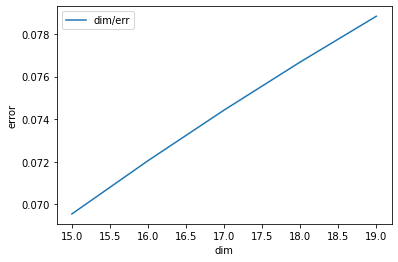

In [97]:
ax1 = sns.lineplot(x=dim, y=errors, label='dim/err')
st1 = ax1.set(xlabel='dim', ylabel='error')


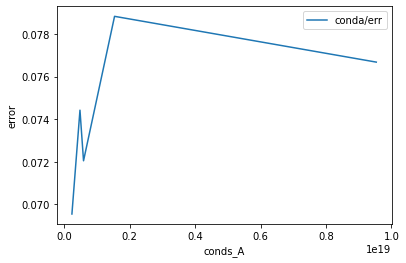

In [96]:
ax1 = sns.lineplot(x=conds_A, y=errors, label='cond_a/err')
st1 = ax1.set(xlabel='conds_A', ylabel='error')


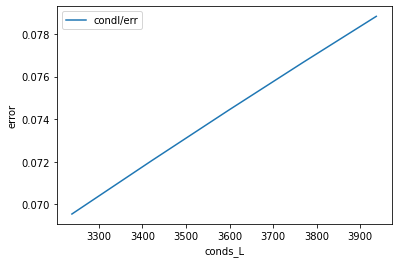

In [98]:
ax1 = sns.lineplot(x=conds_L, y=errors, label='cond_l/err')
st1 = ax1.set(xlabel='conds_L', ylabel='error')

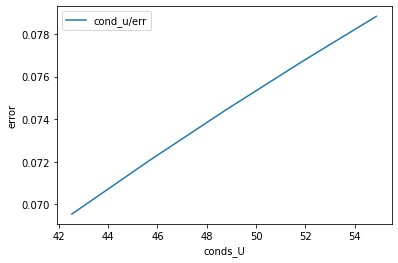

In [99]:
ax1 = sns.lineplot(x=conds_U, y=errors, label='cond_u/err')
st1 = ax1.set(xlabel='conds_U', ylabel='error')

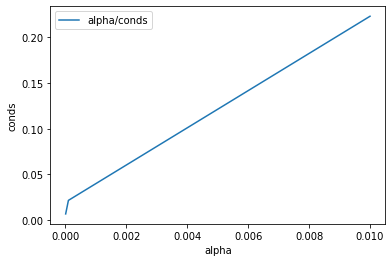

In [102]:
#Alpha
alpha_list = [0.01, 0.0001, 0.00001]
conds_newa, errors = test_alpha(15, alpha_list)
ax1 = sns.lineplot(x=alpha_list, y=conds_newa, label='alpha/conds')
st1 = ax1.set(xlabel='alpha', ylabel='conds')

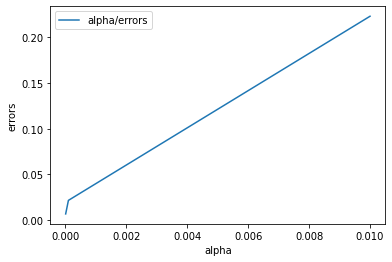

In [103]:
ax1 = sns.lineplot(x=alpha_list, y=errors, label='alpha/errors')
st1 = ax1.set(xlabel='alpha', ylabel='errors')

In [88]:
N = 15
H = hilbert(N)
new_H = H + np.eye(N) * 0.001
right_solution = np.ones(N)
b = np.matmul(H, right_solution)
#solution1 = np.linalg.solve(H, b)
#solution2 = np.linalg.solve(new_H, b)
#solution1, solution2
dec = LUDecomposition(new_H)
L = dec.L 
U = dec.U
#L, U
y = solve_down_trig(L, b)
solve_upper_trig(U, y)

array([1.0005151 , 1.00078546, 0.98956162, 0.99441989, 1.00398367,
       1.01227851, 1.01713985, 1.01815019, 1.01559961, 1.01001649,
       1.00196548, 0.99196669, 0.98046904, 0.96784716, 0.95440755])

In [100]:
A = np.array([
    [1., 0., 7.],
    [2., 1., 5.],
    [3., 1., 5.]
])

x_ = np.array([
    [1.],
    [1.],
    [1.]
])

b = np.matmul(A, x_)

solve_with_LU(A, b)


(array([1., 1., 1.]),
 array([[ 1.,  0.,  0.],
        [ 2.,  1.,  0.],
        [ 3.,  1., -7.]]),
 array([[ 1.,  0.,  7.],
        [ 0.,  1., -9.],
        [ 0.,  0.,  1.]]))